**Project Name:**

**Analyzing selling price of used cars using Python**

**Used Car Selling Price Prediction Using Random Forest**

**Importing Dependencies**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection:**

In [2]:
# Load dataset: Car Dekho
from google.colab import files
uploaded= files.upload()

Saving Car_Dekho.csv to Car_Dekho.csv


In [25]:
df= pd.read_csv('Car_Dekho.csv')

In [28]:
# Dataset Preview
df.head(5)

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
# Column Names
print("\nColumn Names:\n", df.columns)


Column Names:
 Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [9]:
# Count of Rows & Columns
print("\nDataset Shape:\n", df.shape)


Dataset Shape:
 (4340, 9)


In [30]:
# DatasetInformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [38]:
# Checking the distribution of categorical data

print(df.Fuel.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())
print(df.Owner.value_counts())

Fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
Seller_Type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
Transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
Owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [12]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


**Data Pre-processing:**

In [11]:
# Drop irrelevant columns (Brand, Model)
df.drop(columns=['Brand', 'Model'], inplace=True)

In [13]:
# Convert categorical columns to numbers
df = pd.get_dummies(df, drop_first=True)
df

,Year,Selling_Price,KM_Driven,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,2007,60000,70000,False,False,False,True,True,False,True,False,False,False,False
1,2007,135000,50000,False,False,False,True,True,False,True,False,False,False,False
2,2012,600000,100000,True,False,False,False,True,False,True,False,False,False,False
3,2017,250000,46000,False,False,False,True,True,False,True,False,False,False,False
4,2014,450000,141000,True,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,True,False,False,False,True,False,True,False,True,False,False
4336,2014,409999,80000,True,False,False,False,True,False,True,False,True,False,False
4337,2009,110000,83000,False,False,False,True,True,False,True,False,True,False,False
4338,2016,865000,90000,True,False,False,False,True,False,True,False,False,False,False


**Split data into Training & Testing Sets**

In [14]:
# Split data into features (X) and target (Y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [15]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Random Forest Regressor Model**

In [39]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [40]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluate model performance**

In [41]:
# Prediction
y_pred = model.predict(X_test)

In [19]:
# Calculating MAE & R^2
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 168994.44
R2 Score: 0.50


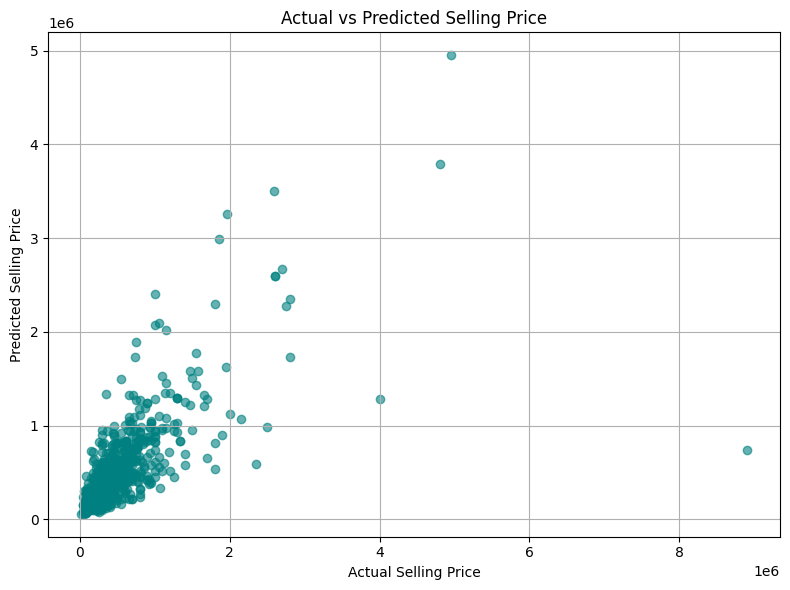

In [20]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.tight_layout()
plt.show()

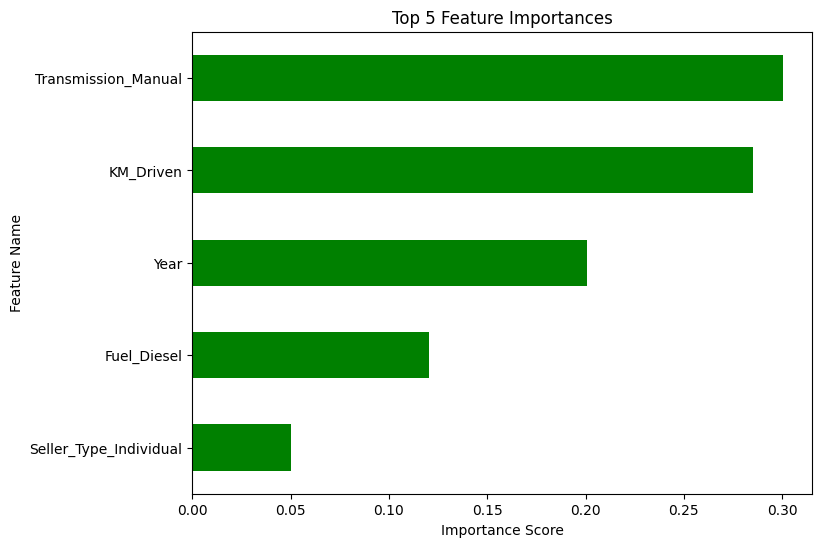

In [21]:
# Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(5)    # Taking only top 5 features
plt.figure(figsize=(8, 6))
top_features.sort_values().plot(kind='barh', color='green')
plt.title("Top 5 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()